# 📘 Project Introduction: Iris Flower Classification Using Logistic Regression
The Iris flower dataset is a classic multivariate dataset introduced by the British biologist and statistician Ronald Fisher. It consists of 150 samples from three species of Iris flowers — setosa, versicolor, and virginica — with four features measured for each sample:

* **sepal length**

* **sepal width**

* **petal length**

* **petal width**. 

The goal of this project is to build a predictive model that accurately classifies the species of an Iris flower based on these four numerical features.

In [1]:
# 📦 Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Model and metrics from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

## 📥 2. Load & Preprocess the Data

In [2]:
df = pd.read_csv('/kaggle/input/iris-dataset/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Check for class imbalance
# if exists then use SMOTE to combat the issue
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

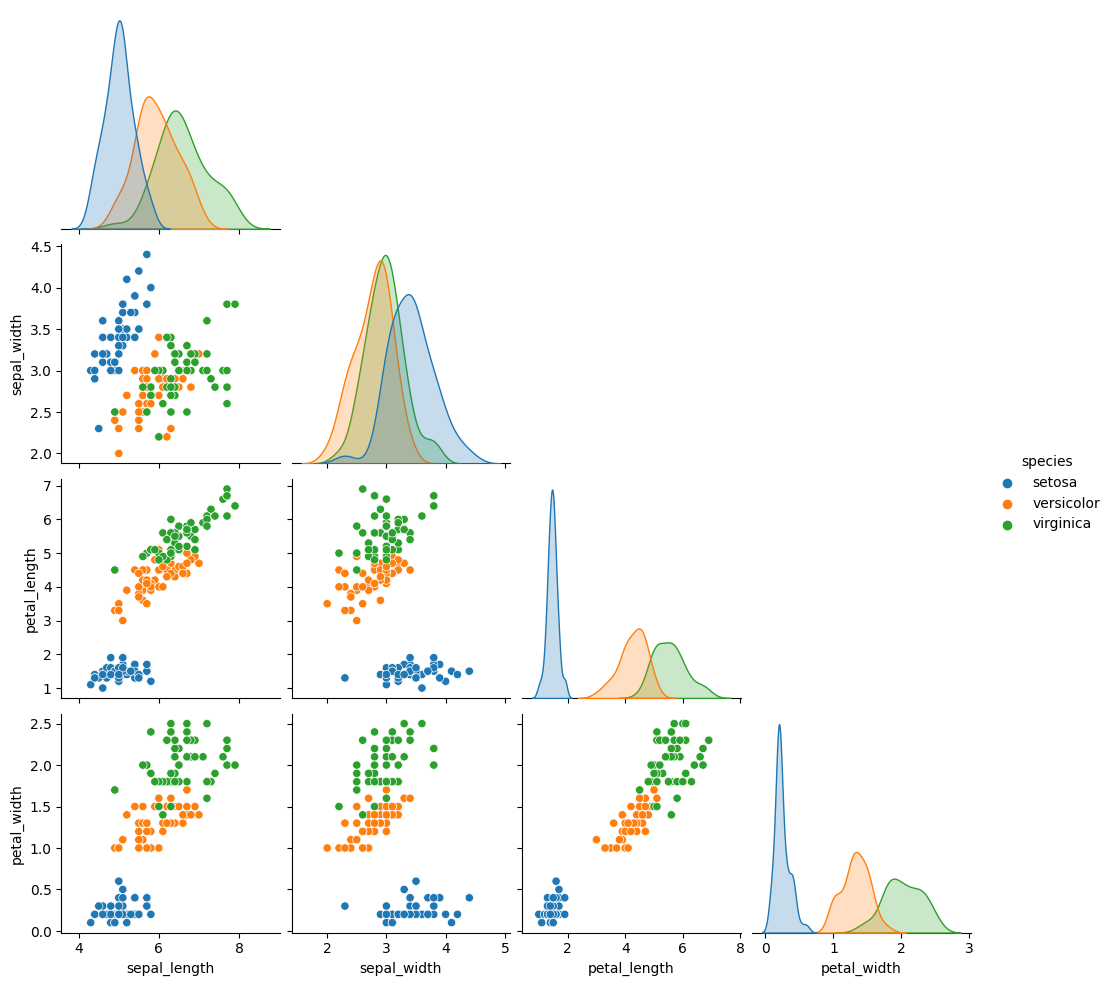

In [5]:
# Plot the relationships between variables
sns.pairplot(df, hue='species', corner=True)

In [6]:
# Encode the target variable
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

# Define features and target
X = df.drop(columns=['species_encoded','species'], axis=1)
y = df['species_encoded']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## 🤖 3. Train Logistic Regression Model

In [7]:
# Instantiate a logistic regression model
logreg = LogisticRegression(fit_intercept=False, solver='saga')

# Fit the model to training data
logreg.fit(X_train, y_train)

# Make predictions on training data
y_train_pred = logreg.predict(X_train)

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      0.92      0.96        37
           2       0.94      1.00      0.97        44

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



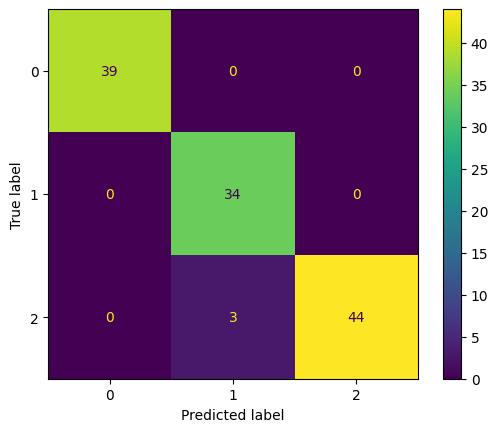

In [8]:
# Compute confusion matrix for training set
cm_train = confusion_matrix(y_train_pred, y_train)
disp_train = ConfusionMatrixDisplay(cm_train)
disp_train.plot()

## 🔁 4. Cross-Validation

In [9]:
cross_scores = cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Mean Accuracy:", cross_scores.mean())

Cross-Validation Mean Accuracy: 0.9749999999999999


## 🧪 5. Test Set Evaluation

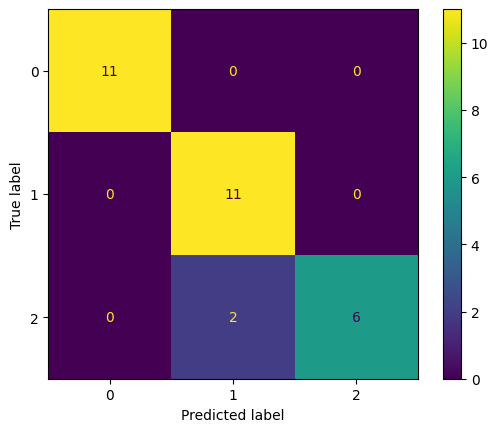

In [10]:
# Predict on test set
y_test_pred = logreg.predict(X_test)

# Confusion matrix for test set
cm_test = confusion_matrix(y_test_pred, y_test)
disp_test = ConfusionMatrixDisplay(cm_test)
disp_test.plot()


In [11]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.85      0.92        13
           2       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30



## 🔍 Results
The logistic regression model achieved an overall accuracy of **93%**. It classified **class 0** perfectly, with precision, recall, and F1-score all at **1.00**. 
**Class 1** had perfect precision (**1.00**) but slightly lower recall (**0.85**), leading to an F1-score of **0.92**. 
For **class 2**, the model had a recall of **1.00** but lower precision (**0.75**), resulting in an F1-score of **0.86**. Overall, the model showed strong and balanced performance across all classes.
